In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('cardio_train.csv',sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data.duplicated().sum()

0

In [5]:
data.count()

id             69301
age            69301
gender         69301
height         69301
weight         69301
ap_hi          69301
ap_lo          69301
cholesterol    69301
gluc           69301
smoke          69301
alco           69301
active         69301
cardio         69301
dtype: int64

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

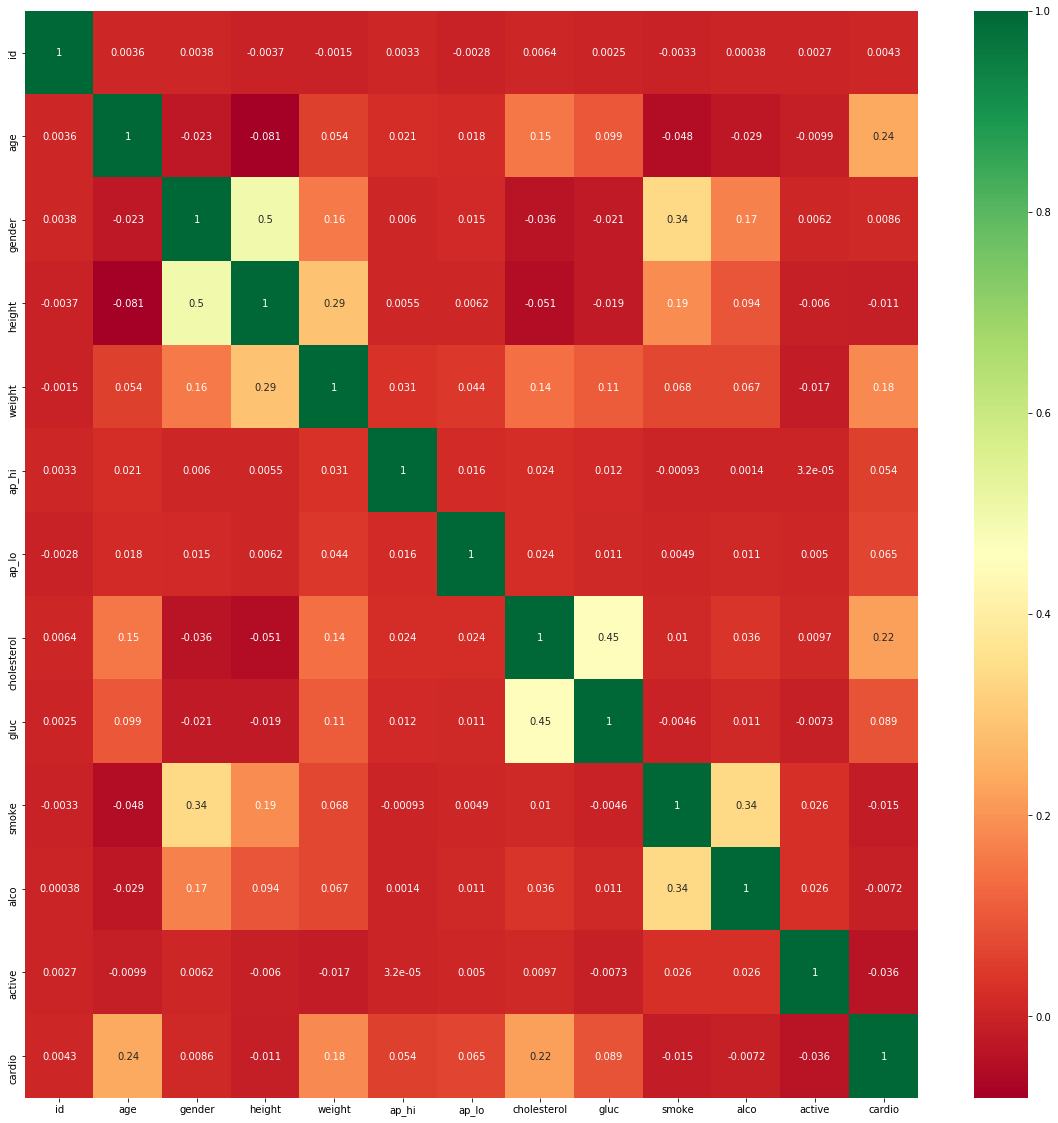

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

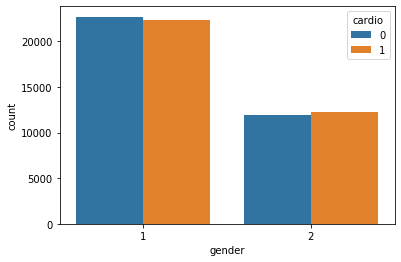

In [8]:
sns.countplot(x='gender',hue='cardio',data=data)

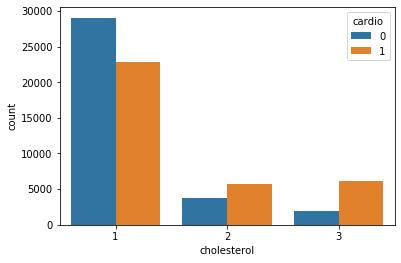

In [9]:
sns.countplot(x='cholesterol',hue='cardio',data=data)

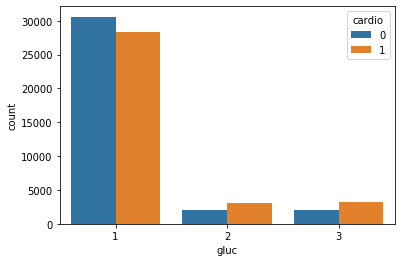

In [10]:
sns.countplot(x='gluc',hue='cardio',data=data)

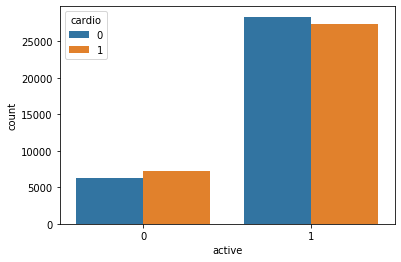

In [11]:
sns.countplot(x='active',hue='cardio',data=data)

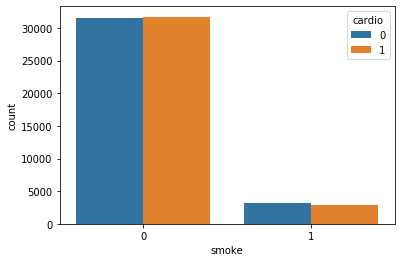

In [12]:
sns.countplot(x='smoke',hue='cardio',data=data)

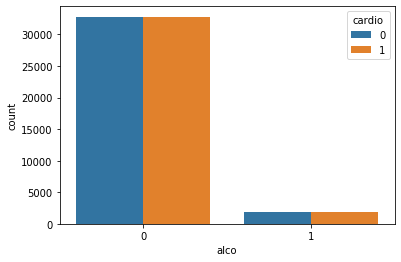

In [13]:
sns.countplot(x='alco',hue='cardio',data=data)

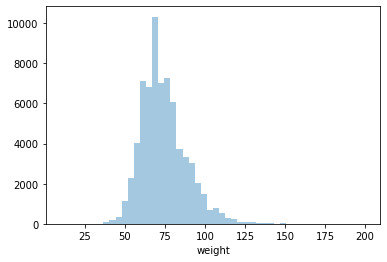

In [14]:
sns.distplot(data['weight'],kde=False)

In [15]:
data['weight'].sort_values().head()

57159    10.0
33118    11.0
59489    21.0
28789    22.0
26107    23.0
Name: weight, dtype: float64

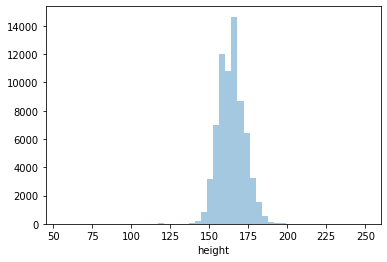

In [16]:
sns.distplot(data['height'],kde=False)

In [17]:
data['height'].max()

250

In [18]:
data['height'].sort_values().head()

22024    55
65944    57
63416    59
28458    60
26904    64
Name: height, dtype: int64

In [19]:
X=data.drop(['weight', 'height', 'cardio'], axis=1)
y = data['cardio']


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred_rfc = rfc.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[7442 2928]
 [3237 7184]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10370
           1       0.71      0.69      0.70     10421

    accuracy                           0.70     20791
   macro avg       0.70      0.70      0.70     20791
weighted avg       0.70      0.70      0.70     20791



In [24]:
rfc.score(X_test, y_test)

0.7034774662113414

In [25]:
from sklearn.model_selection import cross_val_score
accuracies_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

In [26]:
accuracies_rfc

array([0.69140383, 0.69800041, 0.69264069, 0.71057514, 0.70913214,
       0.71840858, 0.70480313, 0.71139971, 0.70212327, 0.71675943])

In [27]:
accuracies_rfc.mean()

0.7055246340960626

In [28]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y_pred_svc = svc.predict(X_test)

In [30]:

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[8021 2349]
 [3332 7089]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10370
           1       0.75      0.68      0.71     10421

    accuracy                           0.73     20791
   macro avg       0.73      0.73      0.73     20791
weighted avg       0.73      0.73      0.73     20791



In [31]:
svc.score(X_test, y_test)

0.7267567697561444

In [32]:
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)
accuracies_svc


array([0.72356215, 0.72541744, 0.71675943, 0.72747887, 0.72892187,
       0.73654917, 0.72459287, 0.72995259, 0.72747887, 0.72562358])

In [33]:
accuracies_svc.mean()

0.726633683776541

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [35]:
y_pred_knn = knn.predict(X_test)

In [36]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[7758 2612]
 [4005 6416]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70     10370
           1       0.71      0.62      0.66     10421

    accuracy                           0.68     20791
   macro avg       0.69      0.68      0.68     20791
weighted avg       0.69      0.68      0.68     20791



In [37]:
knn.score(X_test, y_test)

0.6817372901736328

In [38]:

accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
accuracies_knn

array([0.66996496, 0.6716141 , 0.67182024, 0.68089054, 0.68006597,
       0.69099155, 0.67800454, 0.67697382, 0.68625026, 0.68150897])

In [39]:
accuracies_knn.mean()

0.6788084930942074

In [40]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred_nbc = nbc.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred_nbc))
print(classification_report(y_test, y_pred_nbc))

[[9589  781]
 [7928 2493]]
              precision    recall  f1-score   support

           0       0.55      0.92      0.69     10370
           1       0.76      0.24      0.36     10421

    accuracy                           0.58     20791
   macro avg       0.65      0.58      0.53     20791
weighted avg       0.65      0.58      0.53     20791



In [43]:
nbc.score(X_test, y_test)

0.5811168293973353

In [44]:
accuracies_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)
accuracies_nbc

array([0.5840033 , 0.57513915, 0.57101629, 0.5868893 , 0.57761286,
       0.58874459, 0.58379716, 0.58441558, 0.57740672, 0.57884972])

In [45]:
accuracies_nbc.mean()

0.5807874665017522

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred_xgb = xgb.predict(X_test)

In [49]:
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[8061 2309]
 [3242 7179]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10370
           1       0.76      0.69      0.72     10421

    accuracy                           0.73     20791
   macro avg       0.73      0.73      0.73     20791
weighted avg       0.73      0.73      0.73     20791



In [51]:
accuracies_xgb = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)
accuracies_xgb

array([0.72912801, 0.73325088, 0.72335601, 0.74046588, 0.73572459,
       0.74520717, 0.73263245, 0.73984745, 0.73283859, 0.73881674])

In [52]:
accuracies_xgb.mean()

0.7351267779839208

In [53]:
model = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost']
scores = [accuracies_rfc.mean(),accuracies_svc.mean(),accuracies_knn.mean(),accuracies_nbc.mean(),accuracies_xgb.mean()]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy
XGBoost,0.735127
SVM,0.726634
Random Forest,0.705525
KNN,0.678808
Naive Bayes,0.580787
